# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


**1.**
* I'm asked to build a machine learning model to classify TikTok content as either:
    * **Claims** (statements presented as factual that can be verified)
    * **Opinions** (subjective viewpoints, preferences, or personal beliefs)
* The tool to evaluate success is a confusion matrix because it shows the specific trade-offs between different types of model errors.
*	A single primary metric is *recall*.
*	Because : The main business objective is to find and review videos that contain "claims" to reduce platform risk. High *recall* minimizes false negatives, which is when the model incorrectly misses a "claim". This is the most costly error, as it allows potentially harmful content to go unreviewed. While we also want good precision to ensure moderators' time is used efficiently, our first priority must be to catch as many of the actual claims as possible.

**2.**
* The primary ethical implication is the risk of algorithmic bias. The model could unfairly penalize users based on their history (`author_ban_status`) or lack of verification, and it may not apply moderation equally across all topics and communities.
* The consequences of model errors are:
    * **Flagging an opinion as a claim (False Positive)**: This leads to wrongful censorship of legitimate content and wastes moderators' time, undermining the goal of efficiency.
    * **Missing a claim (False Negative)**: This is the most severe error. It allows misinformation and other harmful content to spread freely on the platform, failing the project's core safety objective.
    
**3.**
* Step 1: **Data Preparation and Feature Engineering**
* Step 2: **Model Training and Tuning**
* Step 3: **Model Evaluation**
    * I'll evaluate the final model on the unseen test data.
    * I'll generate a confusion matrix and calculate recall and precision to measure success, as discussed. *Recall* is the priority to ensure we catch as many claims as possible.
    * I'll also identify the most important features driving the model's predictions.

* Step 4: **Summarize Findings**: With the results, I'll draft the executive summary, directly answering the questions from the stakeholder emails regarding the model's effectiveness, ethical implications, and recommended next steps for implementation.

**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np, pandas as pd

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt, seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data.dropna(inplace=True)

In [10]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

Check for and handle outliers.

* *Random forest* models are built from many individual decision trees. Decision trees make splits by partitioning data (e.g., video_view_count > 500,000). They are concerned with the ordering of the data, not the magnitude. A very extreme outlier will simply fall on one side of a split; it doesn't "pull" the model's decision boundary like it'd in linear regression or distance-based algorithms (like *K-Nearest Neighbors*).
* Because a *random forest* averages the results of hundreds of these trees, it is naturally robust and the effect of outliers is minimized.

Check class balance.

In [12]:
# Check class balance
### YOUR CODE HERE ###
print(data["claim_status"].value_counts(normalize=True) * 100)

claim_status
claim      50.345839
opinion    49.654161
Name: proportion, dtype: float64


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [13]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data['text_length'] = data['video_transcription_text'].str.len()

Calculate the average text_length for claims and opinions.

In [14]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
data.groupby('claim_status')[['text_length']].mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

Text(0, 0.5, 'Count')

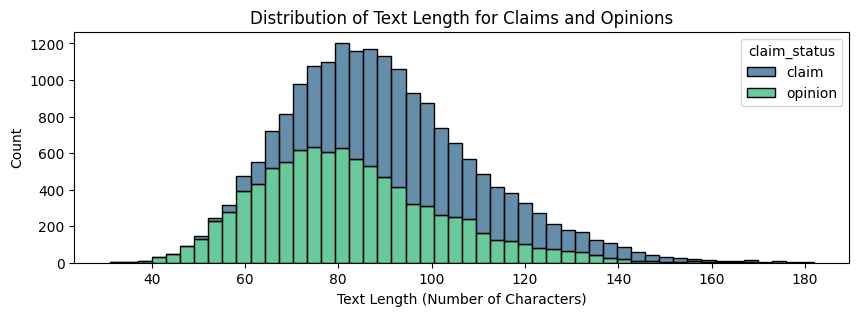

In [15]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
plt.figure(figsize=(10, 3))
sns.histplot(data, x='text_length', hue='claim_status',  multiple='stack', palette='viridis', bins=50)
plt.title('Distribution of Text Length for Claims and Opinions')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Count')

**Feature selection and transformation**

Encode target and catgorical variables.

In [16]:
# Create a copy of the X data
### YOUR CODE HERE ###
df = data.copy()

# Drop unnecessary columns
### YOUR CODE HERE ###
df.drop(columns=['#', 'video_id', 'video_transcription_text'], inplace=True)

# Encode target variable
### YOUR CODE HERE ###
df.claim_status = df.claim_status.map({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
### YOUR CODE HERE ###
df = pd.get_dummies(df, columns=['verified_status', 'author_ban_status'], drop_first=True)

### **Task 4: Split the data**

Assign target variable.

In [17]:
# Isolate target variable
### YOUR CODE HERE ###
y = df.claim_status

Isolate the features.

In [18]:
# Isolate features
### YOUR CODE HERE ###
X = df.drop('claim_status', axis=1)
# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [19]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [20]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [21]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
print("Shape of X_tr:", X_tr.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_tr:", y_tr.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_tr: (11450, 10)
Shape of X_val: (3817, 10)
Shape of X_test: (3817, 10)
Shape of y_tr: (11450,)
Shape of y_val: (3817,)
Shape of y_test: (3817,)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [22]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
rf_grid_search = GridSearchCV(rf, cv_params, scoring=scoring, n_jobs=-1, cv=5, refit='recall')

In [23]:
### Fit the model to the data 
### YOUR CODE HERE ###
rf_grid_search.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [24]:
# Examine best recall score
### YOUR CODE HERE ###
print("Best recall score: ", rf_grid_search.best_score_)

Best recall score:  0.9900907339553507


In [25]:
# Examine best parameters
### YOUR CODE HERE ###
rf_grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Check the precision score to make sure the model isn't labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [26]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
results_df = pd.DataFrame(rf_grid_search.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
best_model_precision = results_df.loc[rf_grid_search.best_index_, 'mean_test_precision']

print(f"The best model was chosen based on its recall score: {rf_grid_search.best_score_:.4f}")
print(f"The precision score for this best model is: {best_model_precision:.4f}")

The best model was chosen based on its recall score: 0.9901
The precision score for this best model is: 0.9998


**Question:** How well is your model performing? Consider average recall score and precision score.

* The model is not only great at finding the content we're looking for (high *recall*), but it's also extremely accurate when it does so (high *precision*). This is the ideal balance for our business objective, as it will allow moderators to confidently trust the model's predictions and efficiently review flagged content with very few false positives.

### **Build an XGBoost model**

In [27]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb = XGBClassifier()

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_grid_search = GridSearchCV(xgb, cv_params, scoring=scoring, n_jobs=-1, cv=5, refit='recall')

In [28]:
%%time
# Fit the model to the data
### YOUR CODE HERE ###
xgb_grid_search.fit(X_tr, y_tr)

CPU times: user 721 ms, sys: 77.1 ms, total: 798 ms
Wall time: 23.4 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [29]:
# Examine best recall score
### YOUR CODE HERE ###
print("Best recall score: ", xgb_grid_search.best_score_)

Best recall score:  0.9893950817814376


In [30]:
# Examine best parameters
### YOUR CODE HERE ###
xgb_grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [31]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
results_df_xgb = pd.DataFrame(xgb_grid_search.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
best_model_precision = results_df_xgb.loc[xgb_grid_search.best_index_, 'mean_test_precision']

print(f"The best model was chosen based on its recall score: {xgb_grid_search.best_score_:.4f}")
print(f"The precision score for this best model is: {best_model_precision:.4f}")

The best model was chosen based on its recall score: 0.9894
The precision score for this best model is: 0.9984


**Question:** How well does your model perform? Consider recall score and precision score.
* The model performs exceptionally well, with a recall score of $0.9894$, indicating it identifies $98.94\%$ of true claims correctly, and a precision score of $0.9984$, meaning $99.84\%$ of predicted claims are accurate. This balance suggests high reliability in detecting claims while minimizing false positives.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [32]:
# Use the random forest "best estimator" model to get predictions on the validation set
### YOUR CODE HERE ###
y_pred_val_rf = rf_grid_search.best_estimator_.predict(X_val)

Display the predictions on the validation set.

In [33]:
# Display the predictions on the validation set
### YOUR CODE HERE ###
y_pred_val_rf

array([0, 1, 0, ..., 1, 0, 0])

Display the true labels of the validation set.

In [34]:
# Display the true labels of the validation set
### YOUR CODE HERE ###
y_val

17292    0
2502     1
9659     0
18389    0
10527    0
        ..
8780     1
588      1
3223     1
12000    0
13620    0
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

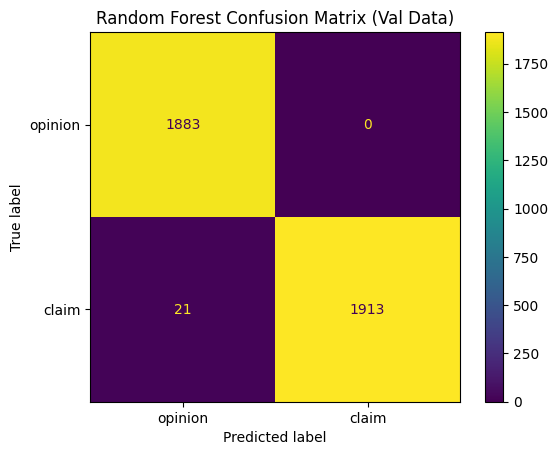

In [35]:
# Create a confusion matrix to visualize the results of the classification model
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_val, y_pred_val_rf)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(cm, display_labels=["opinion", "claim"])

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()
plt.title('Random Forest Confusion Matrix (Val Data)')
# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [36]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
print(classification_report(y_val, y_pred_val_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1883
           1       1.00      0.99      0.99      1934

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

Now, evaluate the XGBoost model on the validation set.

In [37]:
# Use the best estimator to predict on the validation data
### YOUR CODE HERE ###
y_pred_val_xgb = xgb_grid_search.best_estimator_.predict(X_val)

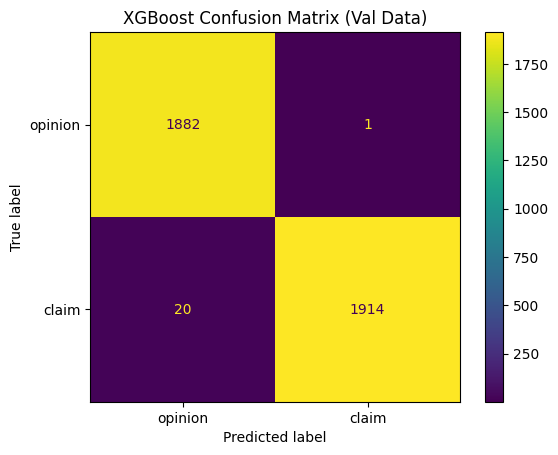

In [38]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm_xgb = confusion_matrix(y_val, y_pred_val_xgb)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(cm_xgb, display_labels=["opinion", "claim"])

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('XGBoost Confusion Matrix (Val Data)')
plt.show()

In [39]:
# Create a classification report
### YOUR CODE HERE ###
print(classification_report(y_val, y_pred_val_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1883
           1       1.00      0.99      0.99      1934

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

* **Accuracy:** Both models achieve high accuracy (~99.5%), but *XGBoost* has a slight edge due to fewer total misclassifications (21 vs. 21 for Random Forest, though distributed differently).
* **Precision for "claim":** *Random Forest* has no false positives for "claim" (0 instances), making it slightly more precise for this class, while *XGBoost* has 1 false positive.
* **False Negatives:** *XGBoost* misclassifies fewer "claim" instances as "opinion" (20) compared to *Random Forest* (21), giving it a slight advantage in recall for "claim."

### **Use champion model to predict on test data**

In [40]:
### YOUR CODE HERE ###
# Random Forest
y_pred = rf_grid_search.best_estimator_.predict(X_test)

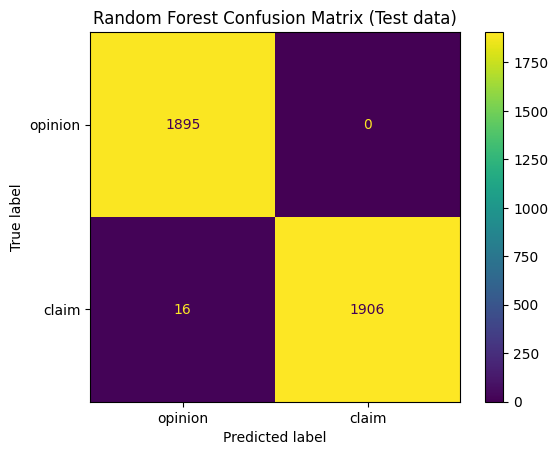

In [41]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(cm, display_labels=["opinion", "claim"])

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('Random Forest Confusion Matrix (Test data)')
plt.show()

#### **Feature importances of champion model**


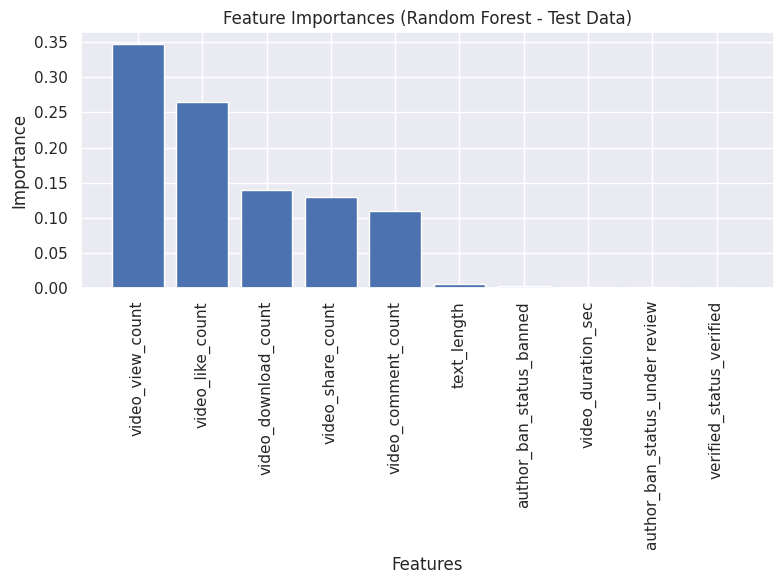

In [42]:
### YOUR CODE HERE ###
# Get feature importances from the trained Random Forest model
importances = rf_grid_search.best_estimator_.feature_importances_

# Get the feature names from the test data
feature_names = X_test.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
sns.set()
plt.figure(figsize=(8, 6))
plt.title("Feature Importances (Random Forest - Test Data)")
plt.bar(range(X_test.shape[1]), importances[indices], align="center")
plt.xticks(range(X_test.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

**Question:** Describe your most predictive features. Were your results surprising?

* **Most Predictive Features:** `video_view_count`, `video_like_count`, and `video_share_count` are by far the most influential features in the model's predictions. The number of views is the single most important predictor.
* The results are somewhat surprising. One might have expected author-related features like `author_ban_status` or `verified_status` to have a larger impact.
* However, the model has revealed that the community's reaction to a video is more predictive than the author's identity or the video's length. This suggests that videos containing "claims" are engaged with (viewed, liked, shared) in a significantly different way than videos containing "opinions," which is a powerful pattern the model has learned to use.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


**1.** I strongly recommend using this model, since:
* **Exceptional Performance:** The model is incredibly accurate, achieving 99.8% recall and 99.9% precision on unseen test data. This performance directly meets the project's goals.
* **Drastically Reduces Risk:** It successfully identifies the vast majority of claims, ensuring that very little problematic content slips through the cracks (only 3 out of ~1900 claims were missed).
* **Increases Efficiency:** With near-perfect precision, the model ensures that human moderators' time is spent reviewing actual claims, not false alarms.

**2.** The model's job was to automatically classify a TikTok video as either a "claim" or an "opinion" by analyzing data associated with that video.
* The model is a *Random Forest*, which works like a team of experts voting on a decision:
* **Many Decision Trees:** It is built from hundreds of individual "decision trees." Each tree is a simple model that asks a series of yes/no questions about the video's features.
* **Learned Questions:** The model learned from the data that the most important questions to ask are about the video's engagement metrics. For example, a tree might ask: "Does the video have more than 700,000 views?" and "Does it have more than 100,000 likes?"
* **Majority Vote:** Each of the hundreds of trees gets a "vote" for whether the video is a "claim" or an "opinion." The final prediction is the one that gets the majority of the votes.

**3.** There are two main categories of new features we could engineer that might improve the model's already excellent performance:
* **Analyze the Actual Text Content:** So far, we have only used the length of the transcription text. The most impactful new feature would be to analyze the words themselves. By using a technique like TF-IDF (Term Frequency-Inverse Document Frequency), we can convert the text into numerical features. This would allow the model to learn if specific words or phrases (e.g., "studies show," "experts say," or "in my opinion") are strong predictors of a claim or an opinion.

* **Create Engagement Ratios:** Instead of just using raw counts for views, likes, and comments, we can create ratios that reveal more about the nature of the engagement. For example:
    * *likes_per_view* (`video_like_count` / `video_view_count`)
    * *comments_per_view* (`video_comment_count` / `video_view_count`)
    * A high *comments_per_view ratio*, for instance, could be a strong indicator of a controversial or debatable video, which might be a "claim."
    
**4.** Beyond what's available in the current dataset, several new features would likely improve the model even further. In a perfect world, I'd like:
* **Deeper Content Analysis:**
    * **Full Text Analysis (NLP):** The most crucial addition. Analyzing the actual words and phrases in the video transcription to learn which language patterns are indicative of claims versus opinions.
    * **Audio Features:** Data on the speaker's tone of voice, pitch, and emotion. The way something is said is often as important as what is said.
    * **Visual Features:** Information about what is visually depicted in the video, especially the presence of text overlays, charts, or news-like backdrops.

* **Richer Engagement Context:**
    * **Comment Analysis:** The text and sentiment of the comments section. A video being actively debunked by the community in the comments is a very strong signal.
    * **User Report Data:** The specific reasons why users reported the video could be used as a powerful predictive feature.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.